# Practice Notebook 1 for Week 11 - KMeans in 2-D

In this notebook you cluster 200 points in two dimensions using KMeans.  The points are generated using a function in Scikit-learn which creates "blobs" so that we visually know the results we should get.  I provide code to generate the blobs and calculate the means/centroid of each blob.  We then perform KMeans clustering using a random initial guess.  Remember that KMeans is an iterative algorithm so to get an idea of what is happening at each iteration we look at the first two iterations of   KMeans using a given initial guess.

1.  Import libraries
1.  Create blobs (just enter cell) and plot
1.  Calculate means/centroids of each blob (just enter cell); the blob means are stored in an array dimensioned 5 by 2 called ```blob_mean```; for example, ```blob_mean[0,0]``` will be the x-coordinate for the first blob and ```blob_mean[0,1]``` will be the y-coordinate for the first blob 
1. Create KMeans model and fit data x which is already in the correct shape (200 by 2)
1. Plot the clusters results from KMeans and visually compare with original clusters
1. Print out the KMeans centroids along with original centroids for comparison
1. Perform 1 iteration of KMeans with the given initial guess for the centroids; plot and compare centroids
1. Perform 2 iterations of KMeans with the given initial guess for the centroids; plot and compare centroids


In [2]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from pandas import DataFrame, Series
import seaborn as sns
#
from sklearn.cluster import KMeans  
from sklearn.datasets import make_blobs

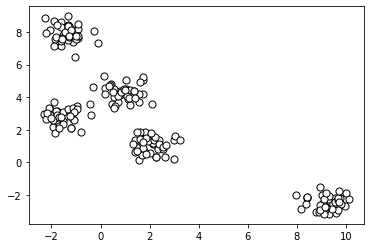

In [107]:
# # Create a data set in 2 dimensions using make_blobs
#
# The function make_blobs stores the data in x and the cluster each point belongs to in y
#
(x,y)= make_blobs (
    n_samples =200, n_features=2,centers=5,cluster_std=0.5,
    shuffle=True,random_state=0
    ) 
plt.scatter(
    x[:,0],x[:,1],
    c='white', edgecolor='black',marker='o', s=50)
plt.show()

In [108]:
# Calculate centroids of blobs; remember that the array y contains cluster number
n = len(y)
n_blobs=5
n_points_blob = 40.
blob_mean = np.zeros( ( n_blobs,2) )  
# 
# Loop to sum up x and y coordinates of each point in blob
for i in range (0,n):
        blob=y[i]  # given blob index  (0,1,2,3,4)
        blob_mean [blob,0] = blob_mean [blob,0] + x[i,0]
        blob_mean [blob,1] = blob_mean [blob,1] + x[i,1]

# Loop to divide by number of points in blob and print out
for k in range (0,n_blobs) :
        blob_mean [k,:] = blob_mean [k,:] / n_points_blob 
        print (f"Blob {k+1} has centroid: ( { blob_mean [k,0] },  { blob_mean [k,1] } )  " ) 
    

Blob 1 has centroid: ( 0.9148227503116141,  4.280336857833884 )  
Blob 2 has centroid: ( 2.054873265582555,  1.1110568334393494 )  
Blob 3 has centroid: ( -1.543516197703645,  2.8134551104965806 )  
Blob 4 has centroid: ( -1.3675452152752192,  7.891534958387625 )  
Blob 5 has centroid: ( 9.210599887923255,  -2.473923314565855 )  


In [1]:
# Create KMeans model and fit data in array x which is in the correct shape:  200 by 2

 

In [2]:
# Plot clusters using colors and compare visually with blob plot above
 

In [4]:
# Print out final clusters centroids and print out actual centroids to compare
#
print ("          KMeans Centroids             ", "                Original Centroids ")
print( )
 
# Note that Kmeans cluster 3 corresponds to our cluster 5 and vice versa

          KMeans Centroids                              Original Centroids 



### KMeans is an iterative algorithm

Now that we know that KMeans gives us the answer we expect using several iterations let's look at what is happens at the end of the first two iterations.

To see the results at the end of the first iteration you need to set the argument ```max_iter=1``` 
To see the results at the end of the second iteration you need to set the argument ```max_iter=2``` 

Use the given initial guess for the centroids.  Perform 1 iteration and plot.  Compare centroids with actual values.

Repeat for 2 iterations.  Notice how points are moving from 1 cluster to the next.
 

In [8]:
#  1 iteration
centroids = np.array( [ [-3,-2], [-2,12], [3,8], [12,0], [2,12] ])
  
print ()
print ("******************************************")
print ("Results for 1st iteration of KMeans")
 


******************************************
Results for 1st iteration of KMeans


In [9]:
#  2  iterations
centroids = np.array( [ [-3,-2], [-2,12], [3,8], [12,0], [2,12] ])
  
print ()
print ("******************************************")
print ("Results for 2nd iteration of KMeans")
 


******************************************
Results for 2nd iteration of KMeans


# Week 11 Practice 2 - Manipulating Dataframes & K-Means - Answers

In this practice notebook we return to a dataset we previously used and now apply K-Means to cluster the data. However, we first explore the data set using some of the functionality learned in Pandas Part 4.  This will help you in your next project.

In the file `insurance.csv` we have data for the yearly insurance costs of individuals based upon several factors such as age, BMI, smoking habits, etc.

We want to cluster the data using __age, BMI__ and __insurance costs__. We  compare the two results.

* Import libraries and K-Means model
* Create dataframe by reading in file 'insurance.csv'; print out first 10 lines
* Create a new dataframe which only has the two features (age and bmi)and the charges
* Determine how many data instances there are (there are many ways to do this; for example, using  .info( )
* Extract NumPy array for costs; print out maximum and minimum value for insurance costs
* Print out the data instance for the maximum insurance charges
* Print out all data instances where the  charges are more than  60,000 dollars
* Print out all data instances where bmi > 35 and charges > 50,000 dollars
* Delete  all data instances where the charges are more than  60,000 dollars; how many data instances do you currently have?
* Determine how many data instances have charges <   1500 dollars (use .shape[0] )
* Extract NumPy arrays for age, BMI and charges.  Remember that the charges you extracted earlier has more data instances than are currently in the dataframe because you deleted some data.  Scale the charges so that they are between 0 and 100 dollars; we do this because   these values are so much larger than age or BMI.  Use the formula
      scaled cost = 100. *(cost - cmin) / (cmax - cmin)   where cmin is minimum insurance cost and cmax the maximum
* Add column to dataframe with these scaled costs and delete the column with unscaled costs.
* Extract NumPy array for scaled costs; put your data (age, bmi, scaled costs) into a 2D array dimensioned by the current number of data instances by 3
* Create 4 clusters using K-Means; print out labels
* Add cluster column to dataframe indicating which cluster each point is in
* Create a scatterplot using relplot of charges vs bmi using color for the cluster
* Create a scatterplot using relplot of charges vs age using color for the cluster 

In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from pandas import DataFrame, Series
import seaborn as sns

# Import models
from sklearn.cluster import KMeans  

In [ ]:
# Create dataframe from  file insurance.csv

In [ ]:
#Create a new dataframe which only has the two features (age and bmi)and the charges
#
 

In [ ]:
# Determine how many data instances there are
 

# so 1338 data instances

In [ ]:
# Find the maximum & minimum value of the charges

In [ ]:
# Print out the data instance where the max occurs 
   

In [ ]:
# Print out all data instances where charges are >60,000

In [ ]:
# Print out all data instances where bmi > 35 and charges > 50,000
 
 

In [ ]:
# Delete all data instances where the charges are more than $60,000
 
# Print out all data instances where charges are >60000 to check

In [ ]:
# Scale costs between $0 and $100; round costs to 2 decimal places (for cents)
# print out the first few entries to check
 

In [ ]:
# Add column to dataframe with scaled charges and remove column with full charges
 

In [ ]:
# Create 2D array and use KMeans with 4 clusters

In [ ]:
# Print out the labels 
 
#
# add column to dataframe giving cluster labels
 

In [3]:
# Set white background grid for Seaborn plots
sns.set_style ( "whitegrid")

In [ ]:
# Create scatterplot of charges vs bmi with cluster indiciated by hue using Seaborn's relplot
 

In [ ]:
# Create scatterplot of charges vs age with cluster indiciated by hue using Seaborn's relplot
 